# Chapter 7: Time Series Analysis with Statsmodels
# By: Parisa Hormozzadeh
Time series analysis helps us understand and forecast data indexed over time.

---

- A sequence of data points recorded at regular time intervals.
- Key components:
  - Trend: long-term increase or decrease.
  - Seasonality: repeating patterns at fixed intervals.
  - Noise: random variations.

---

## 1. Loading Time Series Data
Use pandas to handle datetime and time-indexed data.

---

In [1]:
import pandas as pd
df = pd.read_csv('power_consumption.csv')
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,Low


# 🕒 Time Series Preparation Steps

- **Convert to datetime:**
  - Enables time-based operations like resampling, filtering by date, or extracting components (year, month, etc.).

- **Set datetime as index:**
  - Allows efficient time-based indexing, slicing, rolling calculations, and plotting.


In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low
...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low


## 2. Visualizing the Time Series
Plot the time series to observe patterns.


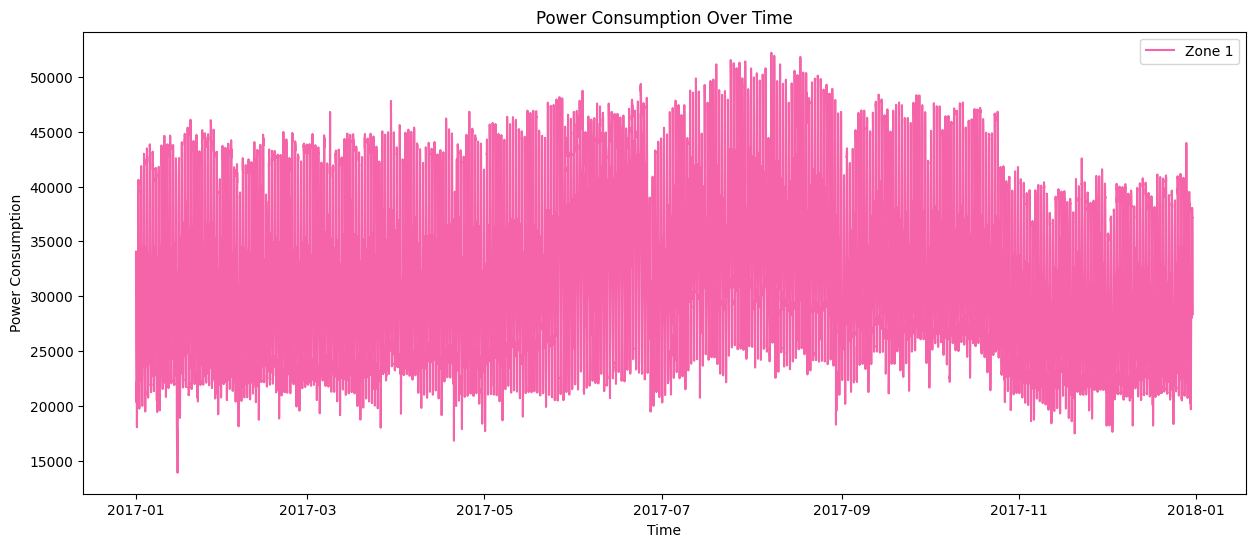

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df['PowerConsumption_Zone1'], label='Zone 1' , color='#F564A9')
plt.title('Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

## 3. Resampling and Frequency Conversion
- Change frequency of data (e.g., daily to weekly averages).


## 3.1. Daily Resampling

<AxesSubplot:title={'center':'Daily Power Consumption - Zone 1'}, xlabel='Datetime'>

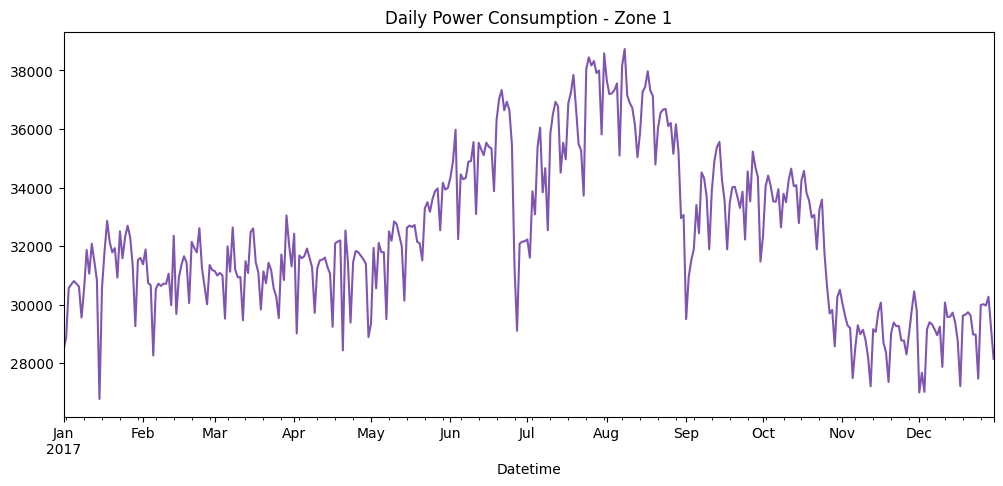

In [7]:
daily_df = df.resample('D').mean()
daily_df['PowerConsumption_Zone1'].plot(figsize=(12, 5), title='Daily Power Consumption - Zone 1' , color='#7F55B1')

### 4.4.1. Daily power consumption at 23:00 (end of day)

<AxesSubplot:title={'center':'Daily power consumption at 23:00 (end of day)'}, xlabel='Datetime'>

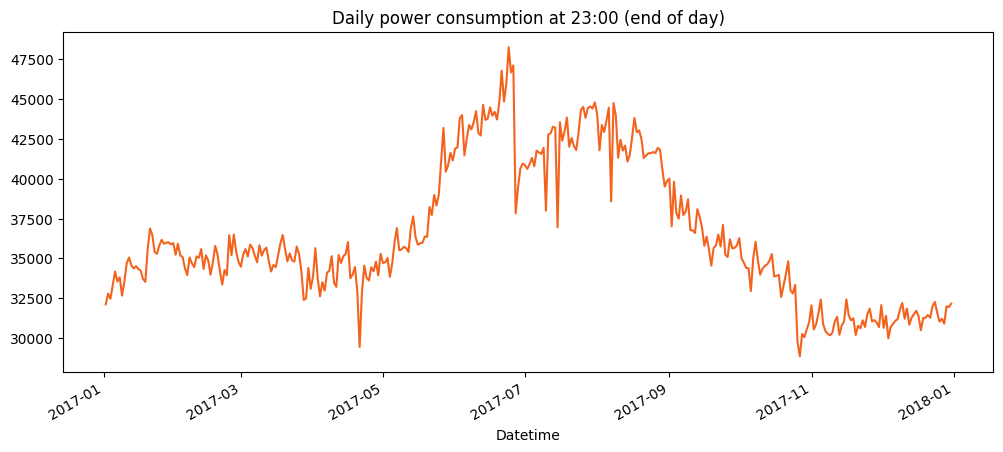

In [8]:
df23PM = df[df.index.time == pd.to_datetime('23:00').time()]
df23PM['PowerConsumption_Zone1'].plot(figsize=(12, 5), title='Daily power consumption at 23:00 (end of day)' , color = '#F4631E')

## 3.2. Weekly Resampling

<AxesSubplot:title={'center':'weekly Power Consumption - Zone 1'}, xlabel='Datetime'>

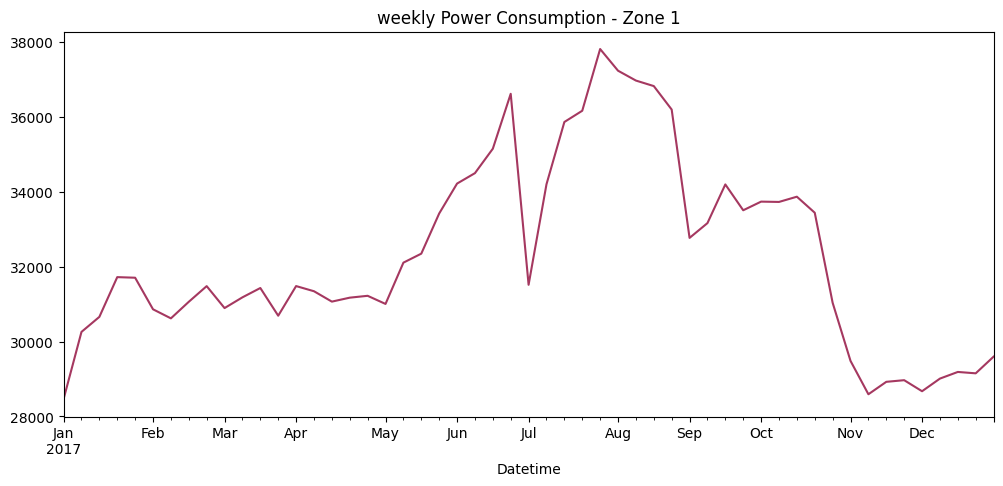

In [9]:
weekly_df = df.resample('W').mean()
weekly_df['PowerConsumption_Zone1'].plot(figsize=(12, 5), title='weekly Power Consumption - Zone 1', color = '#A53860')

## 3.3. Monthly Resampling

<AxesSubplot:title={'center':'monthly Power Consumption - Zone 1'}, xlabel='Datetime'>

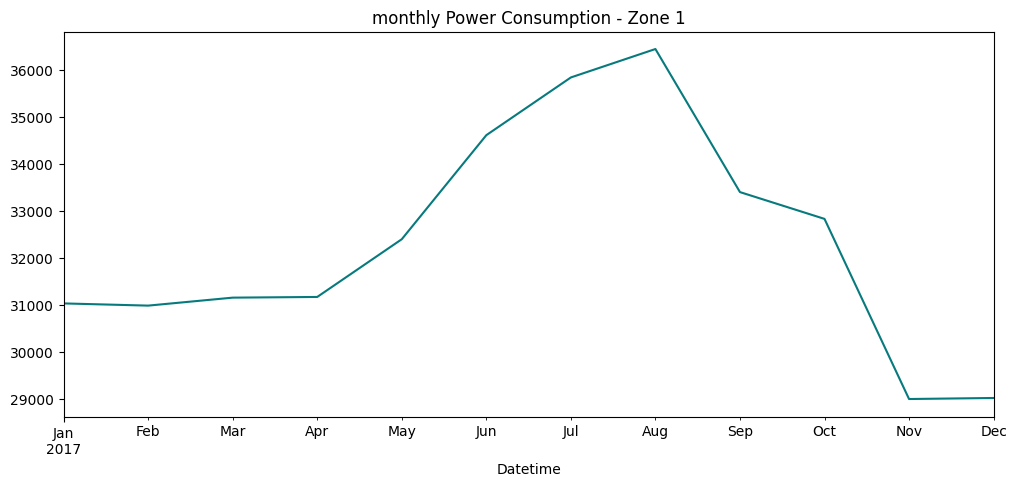

In [10]:
monthly_df = df.resample('M').mean()
monthly_df['PowerConsumption_Zone1'].plot(figsize=(12, 5), title='monthly Power Consumption - Zone 1' , color = '#077A7D')

## 3.4. Yearly Resampling

<AxesSubplot:title={'center':'yearly Power Consumption - Zone 1'}, xlabel='Datetime'>

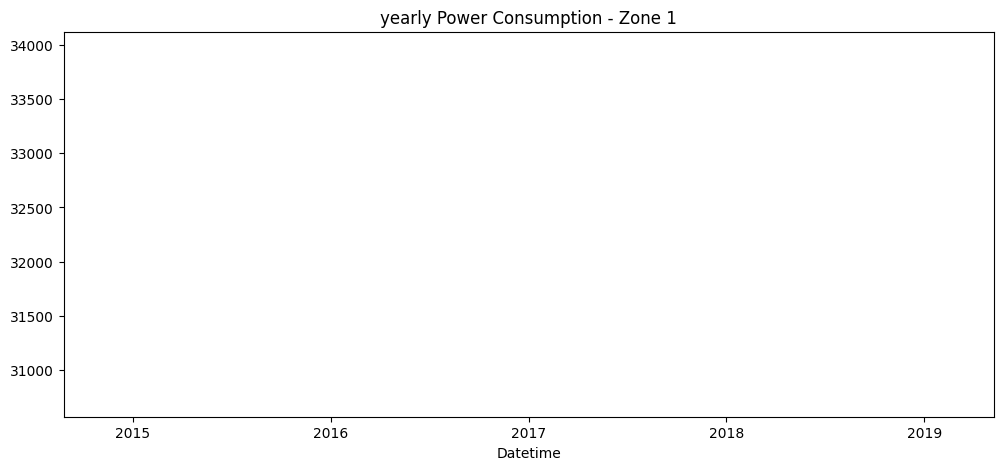

In [21]:
yearly_df = df.resample('Y').mean()
yearly_df['PowerConsumption_Zone1'].plot(figsize=(12, 5), title='yearly Power Consumption - Zone 1')


## 4. Moving Averages and Smoothing
A moving average is a technique to smooth time series data by averaging values over a fixed window of time.

Instead of looking at each point individually (which may have noise or short-term spikes), it shows a "smoothed" version to make trends easier to see.

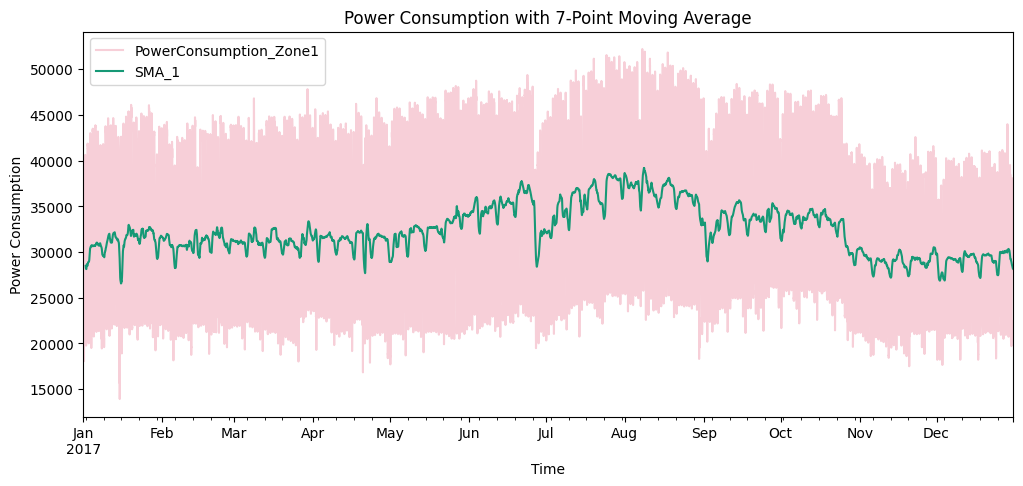

In [14]:
df['SMA_1'] = df['PowerConsumption_Zone1'].rolling(window=144).mean()

df[['PowerConsumption_Zone1', 'SMA_1']].plot(
    figsize=(12, 5), 
    title='Power Consumption with 7-Point Moving Average',
    color=['#F7CFD8', '#169976']  
)

plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.show()

## 5. Decomposition of Time Series
Separate time series into trend, seasonal, and residual components.


1. **Trend** 📈  
   - The long-term direction in the data (increasing, decreasing, or stable).
   - Example: Is electricity consumption steadily rising over the months?

2. **Seasonality** 🔁  
   - Repeating patterns or cycles at regular intervals (daily, weekly, yearly).
   - Example: Higher power usage at night, or during summer.

3. **Residual (Noise)** 🎲  
   - The random variation left after removing trend and seasonality.
   - Represents unexpected or irregular behavior (like outages or anomalies).

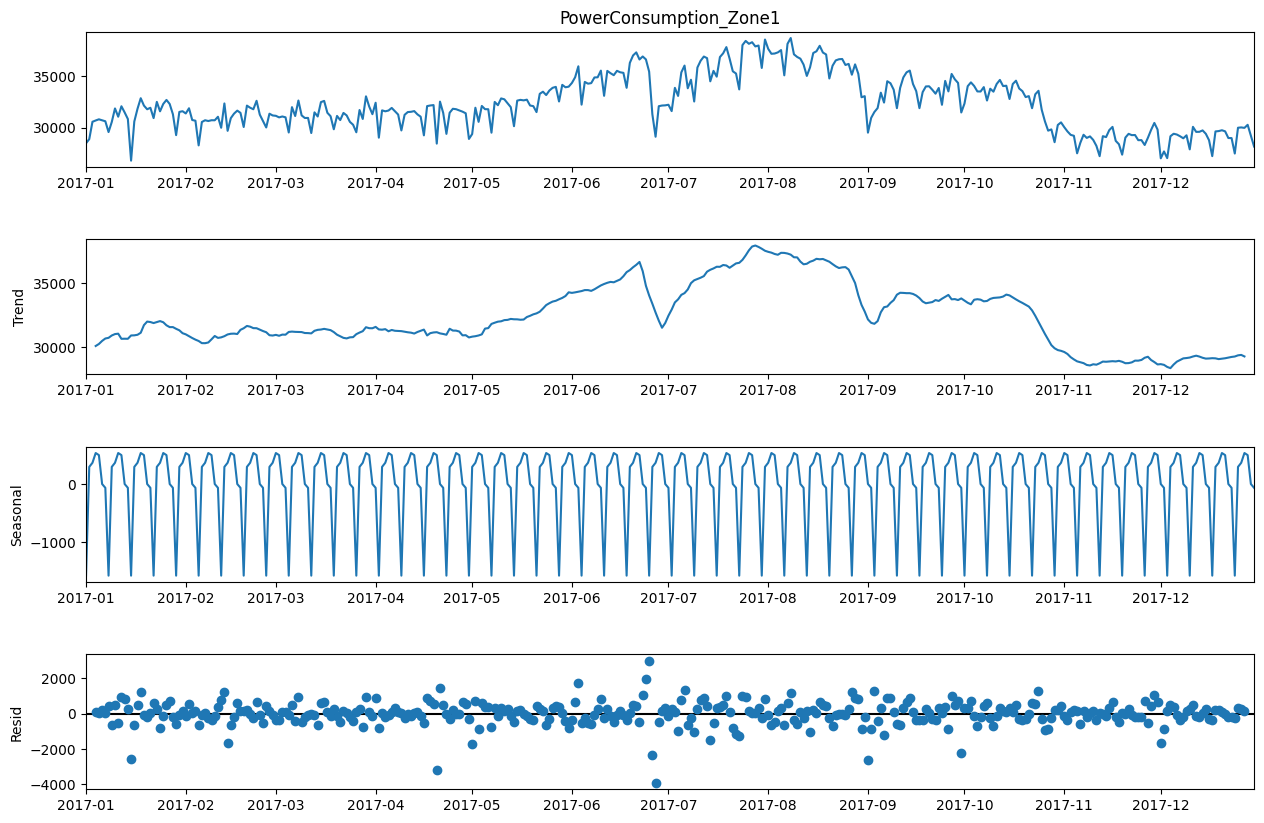

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(daily_df['PowerConsumption_Zone1'], model='additive')
fig = result.plot()
fig.set_size_inches(14, 9)
plt.show()

## 6. Stationarity and Augmented Dickey-Fuller Test


### ❓ What is Stationarity?

A **stationary time series** has statistical properties that do not change over time:

- Constant **mean**
- Constant **variance**
- No significant **trend** or **seasonal patterns**


### 🎯 Why is Stationarity Important?


Most time series forecasting models (like **ARIMA**) assume that the data is **stationary**.  
If the data is not stationary, the model may give **inaccurate or unstable predictions**

### 🧪 What is the ADF Test?

The **Augmented Dickey-Fuller (ADF) test** is used to check whether a time series is stationary.


| p-value        | Conclusion             |
|----------------|------------------------|
| `< 0.05`       | ✅ Stationary           |
| `>= 0.05`      | ❌ Not stationary       |

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['PowerConsumption_Zone1'].dropna())

print('p-value:', result[1])


p-value: 0.0


### What if the Data is Not Stationary?

Use **differencing**:

In [36]:
df['diff'] = df['PowerConsumption_Zone1'].diff()
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerDemandCategory,SMA_7,SMA_30,SMA_1,diff
Datetime,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,Low,NaN,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,Low,NaN,NaN,NaN,-4241.01266
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,Low,NaN,NaN,NaN,-686.58227
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,Low,NaN,NaN,NaN,-899.24051
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,Low,NaN,NaN,NaN,-893.16456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,High,35936.121673,35936.121673,28154.964090,-997.71863
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,Low,35683.041825,35683.041825,28152.936206,-730.03802
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,Low,35402.382763,35402.382763,28147.782003,-839.54373


## 7. Basic Forecasting with ARIMA (AutoRegressive Integrated Moving Average)
- ARIMA combines autoregression, differencing, and moving average.

| Component  | Description                                                                                                                             |
| ---------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **AR (p)** | AutoRegression: The relationship between an observation and a number of lagged (previous) observations.                                 |
| **I (d)**  | Integrated: The number of times the data has been differenced to make it stationary.                                                    |
| **MA (q)** | Moving Average: The relationship between an observation and residual errors from a moving average model applied to lagged observations. |


In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model: (p=5, d=1, q=0) are example parameters
model = ARIMA(daily_df['PowerConsumption_Zone1'], order=(30, 1, 0))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
print(forecast)


2017-12-31    27584.654199
2018-01-01    28797.079040
2018-01-02    28801.647175
2018-01-03    28997.542278
2018-01-04    29032.502338
2018-01-05    28663.752840
2018-01-06    28387.306734
Freq: D, Name: predicted_mean, dtype: float64


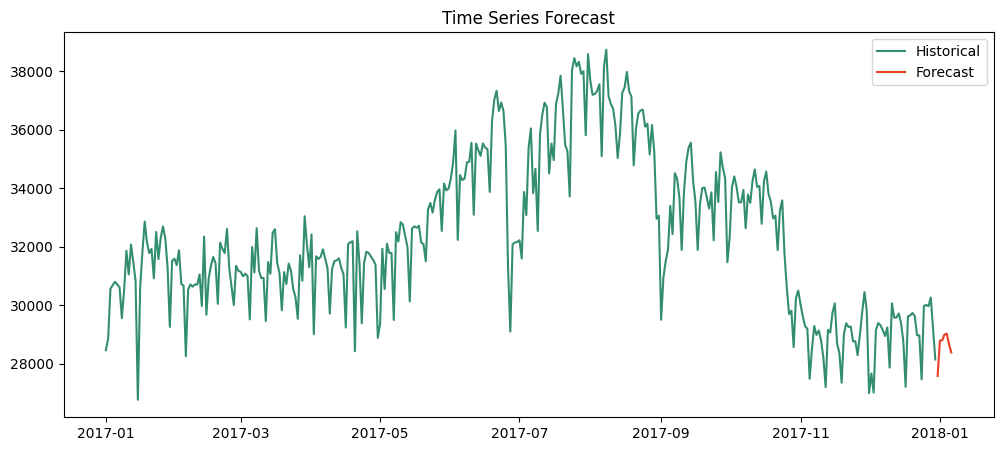

In [17]:
plt.figure(figsize=(12,5))
plt.plot(daily_df['PowerConsumption_Zone1'], label='Historical' , color='#328E6E')
plt.plot(forecast.index, forecast, label='Forecast', color='#E83F25')
plt.legend()
plt.title('Time Series Forecast')
plt.show()

## Summary
- Time series data requires special handling for time indexes.
- Visualization, smoothing, and decomposition help understand components.
- Stationarity is important for many forecasting models.
- ARIMA is a common forecasting model that combines autoregression and moving averages.

Next: Explore advanced forecasting models and anomaly detection.